Credit card percentage model w/ Variables (Airfare CPI, Federal Funds Rate, Unemployment Rate)

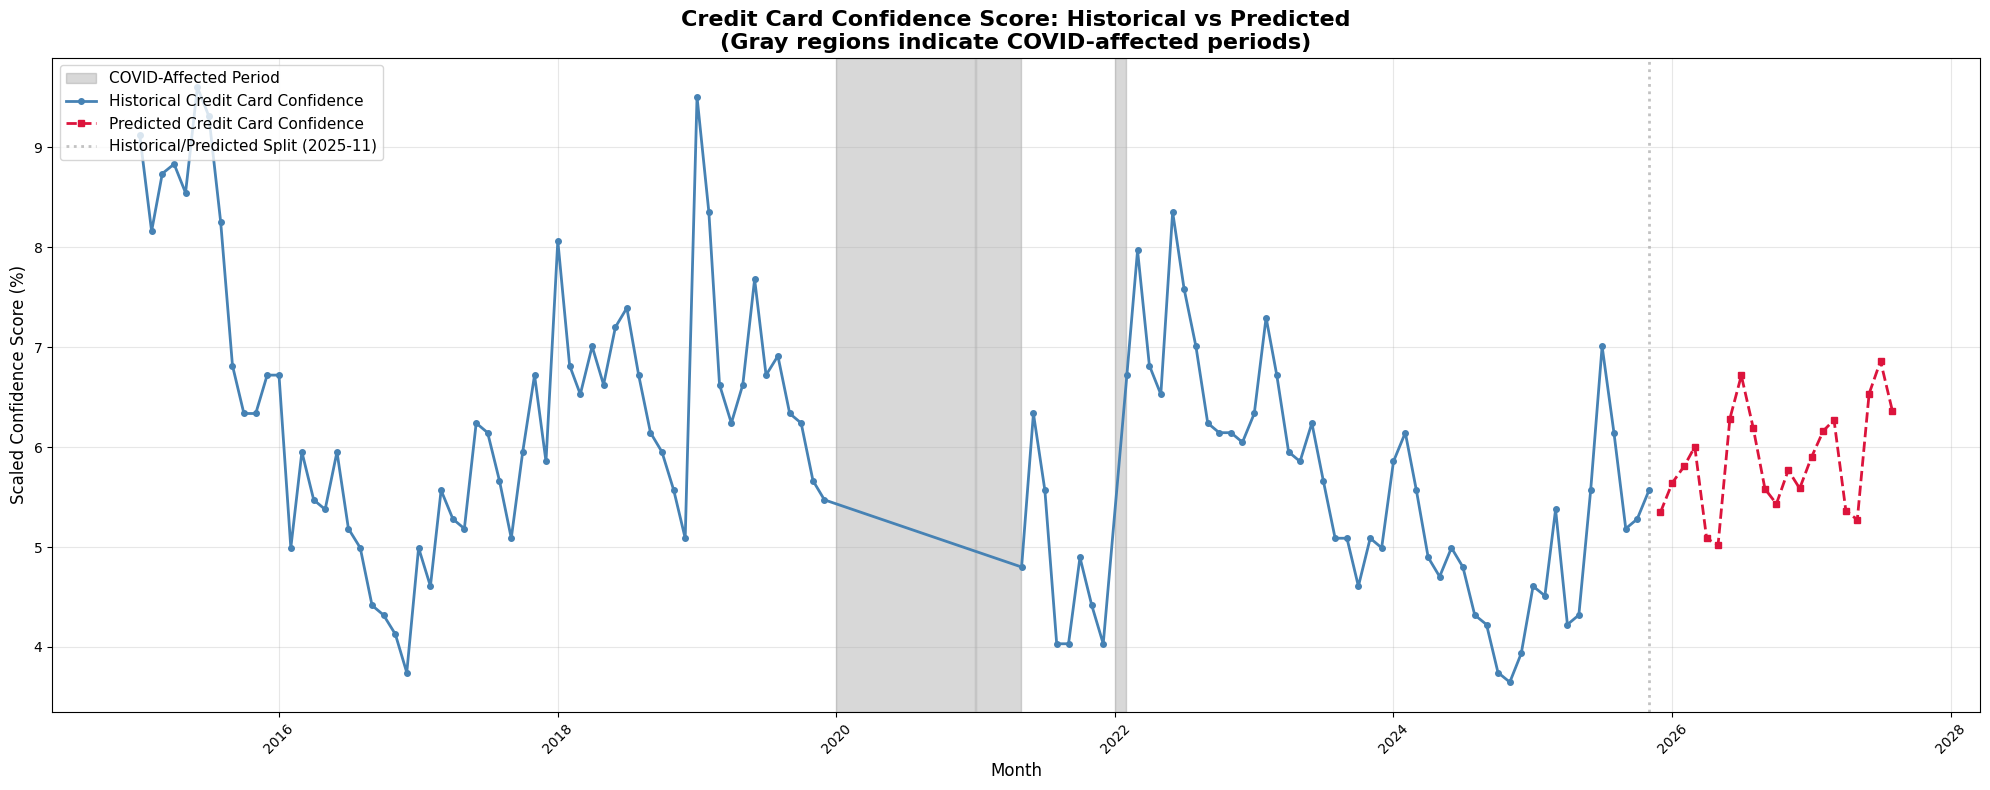

=== SUMMARY STATISTICS ===

Historical Data (up to 2025-11):
  Count: 114
  Mean: 6.00%
  Std Dev: 1.35%
  Min: 3.65%
  Max: 9.60%

Predicted Data (after 2025-11):
  Count: 21
  Mean: 5.87%
  Std Dev: 0.53%
  Min: 5.02%
  Max: 6.86%

=== COVID-AFFECTED PERIODS (GRAYED OUT) ===
  - All of 2020 (Jan-Dec 2020)
  - First 4 months of 2021 (Jan-Apr 2021)
  - January 2022

=== STATISTICAL ANALYSIS ===

1. Two-Sample T-Test (Historical vs Predicted):
   t-statistic: 0.4467
   p-value: 0.6558
   ✗ No significant difference between historical and predicted means (p >= 0.05)

2. Mann-Whitney U Test (Non-parametric):
   U-statistic: 1206.0000
   p-value: 0.9588
   ✗ No significant difference in distributions (p >= 0.05)

3. Levene's Test (Equality of Variances):
   Levene statistic: 11.0867
   p-value: 0.0011
   ✓ Variances are significantly different (p < 0.05)

4. Trend Analysis (Linear Regression):

   Historical Period:
      Slope: -0.0167 (change per month)
      R-squared: 0.1681
      p-va

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Load the data
data = {
    'Month': ['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01', '2015-05-01', '2015-06-01',
              '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
              '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01',
              '2016-07-01', '2016-08-01', '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
              '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01',
              '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
              '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
              '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
              '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01', '2019-05-01', '2019-06-01',
              '2019-07-01', '2019-08-01', '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
              '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01', '2021-09-01', '2021-10-01',
              '2021-11-01', '2021-12-01', '2022-02-01', '2022-03-01', '2022-04-01', '2022-05-01',
              '2022-06-01', '2022-07-01', '2022-08-01', '2022-09-01', '2022-10-01', '2022-11-01',
              '2022-12-01', '2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01', '2023-05-01',
              '2023-06-01', '2023-07-01', '2023-08-01', '2023-09-01', '2023-10-01', '2023-11-01',
              '2023-12-01', '2024-01-01', '2024-02-01', '2024-03-01', '2024-04-01', '2024-05-01',
              '2024-06-01', '2024-07-01', '2024-08-01', '2024-09-01', '2024-10-01', '2024-11-01',
              '2024-12-01', '2025-01-01', '2025-02-01', '2025-03-01', '2025-04-01', '2025-05-01',
              '2025-06-01', '2025-07-01', '2025-08-01', '2025-09-01', '2025-10-01', '2025-11-01',
              '2025-12-01', '2026-01-01', '2026-02-01', '2026-03-01', '2026-04-01', '2026-05-01',
              '2026-06-01', '2026-07-01', '2026-08-01', '2026-09-01', '2026-10-01', '2026-11-01',
              '2026-12-01', '2027-01-01', '2027-02-01', '2027-03-01', '2027-04-01', '2027-05-01',
              '2027-06-01', '2027-07-01', '2027-08-01'],
    'ScaledPercent': [9.12, 8.16, 8.736, 8.832, 8.544, 9.6, 9.312, 8.256, 6.816, 6.336, 6.336, 6.72,
                      6.72, 4.992, 5.952, 5.472, 5.376, 5.952, 5.184, 4.992, 4.416, 4.32, 4.128, 3.744,
                      4.992, 4.608, 5.568, 5.28, 5.184, 6.24, 6.144, 5.664, 5.088, 5.952, 6.72, 5.856,
                      8.064, 6.816, 6.528, 7.008, 6.624, 7.2, 7.392, 6.72, 6.144, 5.952, 5.568, 5.088,
                      9.504, 8.352, 6.624, 6.24, 6.624, 7.68, 6.72, 6.912, 6.336, 6.24, 5.664, 5.472,
                      4.8, 6.336, 5.568, 4.032, 4.032, 4.896, 4.416, 4.032, 6.72, 7.968, 6.816, 6.528,
                      8.352, 7.584, 7.008, 6.24, 6.144, 6.144, 6.048, 6.336, 7.296, 6.72, 5.952, 5.856,
                      6.24, 5.664, 5.088, 5.088, 4.608, 5.088, 4.992, 5.856, 6.144, 5.568, 4.896, 4.704,
                      4.992, 4.8, 4.32, 4.224, 3.744, 3.648, 3.936, 4.608, 4.512, 5.376, 4.224, 4.32,
                      5.568, 7.008, 6.144, 5.184, 5.28, 5.568, 5.348171514272502, 5.642350079796097,
                      5.8080725628276175, 6.002725382515154, 5.086230134392167, 5.020448856730207,
                      6.284910223030227, 6.716272000516867, 6.1947943427926875, 5.581295189112827,
                      5.432122066377441, 5.768729666061314, 5.586168689486723, 5.899583013582311,
                      6.162851117016169, 6.2710254010493145, 5.365276430004657, 5.272299494158216,
                      6.533880968074202, 6.861063256497248, 6.362009380738982]
}
df = pd.DataFrame(data)
df['Month'] = pd.to_datetime(df['Month'])

# Split into historical and predicted
cutoff_date = pd.to_datetime('2025-11-01')
df_historical = df[df['Month'] <= cutoff_date]
df_predicted = df[df['Month'] > cutoff_date]

# Create the plot
fig, ax = plt.subplots(figsize=(20, 8))

# Define COVID-affected periods to gray out
covid_periods = [
    (pd.to_datetime('2020-01-01'), pd.to_datetime('2020-12-31')),  # All of 2020
    (pd.to_datetime('2021-01-01'), pd.to_datetime('2021-04-30')),  # Jan-Apr 2021
    (pd.to_datetime('2022-01-01'), pd.to_datetime('2022-01-31'))   # Jan 2022
]

# Add gray shaded regions for COVID periods
y_min, y_max = 0, 12  # Adjust based on your data range
for start_date, end_date in covid_periods:
    ax.axvspan(start_date, end_date, alpha=0.3, color='gray', label='COVID-Affected Period' if start_date == pd.to_datetime('2020-01-01') else '')

# Plot historical data in blue
ax.plot(df_historical['Month'], df_historical['ScaledPercent'],
        marker='o', color='steelblue', label='Historical Credit Card Confidence',
        markersize=4, linewidth=2, zorder=3)

# Plot predicted data in red
ax.plot(df_predicted['Month'], df_predicted['ScaledPercent'],
        marker='s', color='crimson', label='Predicted Credit Card Confidence',
        markersize=4, linewidth=2, linestyle='--', zorder=3)

# Add vertical line at the cutoff
ax.axvline(x=cutoff_date, color='darkgray', linestyle=':', linewidth=2, alpha=0.7,
           label='Historical/Predicted Split (2025-11)', zorder=2)

# Formatting
ax.set_title('Credit Card Confidence Score: Historical vs Predicted\n(Gray regions indicate COVID-affected periods)',
             fontsize=16, fontweight='bold')
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Scaled Confidence Score (%)', fontsize=12)
ax.legend(loc='upper left', fontsize=11)
ax.grid(True, alpha=0.3, zorder=1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print summary statistics
print("=" * 60)
print("=== SUMMARY STATISTICS ===")
print("=" * 60)
print(f"\nHistorical Data (up to 2025-11):")
print(f"  Count: {len(df_historical)}")
print(f"  Mean: {df_historical['ScaledPercent'].mean():.2f}%")
print(f"  Std Dev: {df_historical['ScaledPercent'].std():.2f}%")
print(f"  Min: {df_historical['ScaledPercent'].min():.2f}%")
print(f"  Max: {df_historical['ScaledPercent'].max():.2f}%")

print(f"\nPredicted Data (after 2025-11):")
print(f"  Count: {len(df_predicted)}")
print(f"  Mean: {df_predicted['ScaledPercent'].mean():.2f}%")
print(f"  Std Dev: {df_predicted['ScaledPercent'].std():.2f}%")
print(f"  Min: {df_predicted['ScaledPercent'].min():.2f}%")
print(f"  Max: {df_predicted['ScaledPercent'].max():.2f}%")

print("\n" + "=" * 60)
print("=== COVID-AFFECTED PERIODS (GRAYED OUT) ===")
print("=" * 60)
print("  - All of 2020 (Jan-Dec 2020)")
print("  - First 4 months of 2021 (Jan-Apr 2021)")
print("  - January 2022")

# =====================================================
# === STATISTICAL TESTS AND MAPE CALCULATIONS ===
# =====================================================

print("\n" + "=" * 60)
print("=== STATISTICAL ANALYSIS ===")
print("=" * 60)

# 1. T-Test: Compare means of historical vs predicted
t_stat, p_value_ttest = stats.ttest_ind(df_historical['ScaledPercent'],
                                         df_predicted['ScaledPercent'])
print(f"\n1. Two-Sample T-Test (Historical vs Predicted):")
print(f"   t-statistic: {t_stat:.4f}")
print(f"   p-value: {p_value_ttest:.4f}")
if p_value_ttest < 0.05:
    print(f"   ✓ Significant difference between historical and predicted means (p < 0.05)")
else:
    print(f"   ✗ No significant difference between historical and predicted means (p >= 0.05)")

# 2. Mann-Whitney U Test (non-parametric alternative)
u_stat, p_value_mann = stats.mannwhitneyu(df_historical['ScaledPercent'],
                                          df_predicted['ScaledPercent'],
                                          alternative='two-sided')
print(f"\n2. Mann-Whitney U Test (Non-parametric):")
print(f"   U-statistic: {u_stat:.4f}")
print(f"   p-value: {p_value_mann:.4f}")
if p_value_mann < 0.05:
    print(f"   ✓ Significant difference in distributions (p < 0.05)")
else:
    print(f"   ✗ No significant difference in distributions (p >= 0.05)")

# 3. Levene's Test for equality of variances
levene_stat, p_value_levene = stats.levene(df_historical['ScaledPercent'],
                                            df_predicted['ScaledPercent'])
print(f"\n3. Levene's Test (Equality of Variances):")
print(f"   Levene statistic: {levene_stat:.4f}")
print(f"   p-value: {p_value_levene:.4f}")
if p_value_levene < 0.05:
    print(f"   ✓ Variances are significantly different (p < 0.05)")
else:
    print(f"   ✗ Variances are not significantly different (p >= 0.05)")

# 4. Trend Analysis - Linear regression for both periods
def calculate_trend(df_subset, label):
    """Calculate linear trend and its significance"""
    x = np.arange(len(df_subset))
    y = df_subset['ScaledPercent'].values

    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

    print(f"\n   {label}:")
    print(f"      Slope: {slope:.4f} (change per month)")
    print(f"      R-squared: {r_value**2:.4f}")
    print(f"      p-value: {p_value:.4f}")
    if p_value < 0.05:
        if slope > 0:
            print(f"      ✓ Significant increasing trend (p < 0.05)")
        else:
            print(f"      ✓ Significant decreasing trend (p < 0.05)")
    else:
        print(f"      ✗ No significant trend (p >= 0.05)")

    return slope, p_value

print(f"\n4. Trend Analysis (Linear Regression):")
hist_slope, hist_p = calculate_trend(df_historical, "Historical Period")
pred_slope, pred_p = calculate_trend(df_predicted, "Predicted Period")

# =====================================================
# === MAPE CALCULATIONS ===
# =====================================================

print("\n" + "=" * 60)
print("=== MAPE (Mean Absolute Percentage Error) ===")
print("=" * 60)

def calculate_mape(y_true, y_pred):
    """Calculate MAPE with proper error handling"""
    y_true = np.asarray(y_true, dtype=float)
    y_pred = np.asarray(y_pred, dtype=float)
    mask = (y_true != 0) & ~np.isnan(y_true) & ~np.isnan(y_pred)
    if mask.sum() == 0:
        return np.nan
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

# Option A: Forecast MAPE (if you have actual future data)
print("\nA. Forecast MAPE:")
try:
    df_actual_future = pd.read_csv('actual_confidence_future.csv')
    df_actual_future['Month'] = pd.to_datetime(df_actual_future['Month'])

    # Merge predicted with actuals by Month
    eval_df = df_predicted.merge(df_actual_future, on='Month', suffixes=('_pred', '_actual'))

    if len(eval_df) == 0:
        print("   ✗ No overlapping months between predicted and actual data")
    else:
        forecast_mape = calculate_mape(eval_df['ScaledPercent_actual'], eval_df['ScaledPercent_pred'])
        mae = np.mean(np.abs(eval_df['ScaledPercent_actual'] - eval_df['ScaledPercent_pred']))
        rmse = np.sqrt(np.mean((eval_df['ScaledPercent_actual'] - eval_df['ScaledPercent_pred'])**2))

        print(f"   ✓ Forecast MAPE: {forecast_mape:.2f}%")
        print(f"   ✓ Mean Absolute Error (MAE): {mae:.2f}")
        print(f"   ✓ Root Mean Squared Error (RMSE): {rmse:.2f}")
        print(f"   ✓ Based on {len(eval_df)} matched months")

except FileNotFoundError:
    print("   ✗ File 'actual_confidence_future.csv' not found")
    print("   ℹ To compute forecast MAPE, provide actuals for predicted months")

# Option B: Backtest MAPE (if predicted overlaps with historical)
print("\nB. Backtest MAPE:")
overlap = df_predicted.merge(df_historical[['Month', 'ScaledPercent']],
                             on='Month', suffixes=('_pred', '_actual'))

if not overlap.empty:
    backtest_mape = calculate_mape(overlap['ScaledPercent_actual'], overlap['ScaledPercent_pred'])
    mae = np.mean(np.abs(overlap['ScaledPercent_actual'] - overlap['ScaledPercent_pred']))
    rmse = np.sqrt(np.mean((overlap['ScaledPercent_actual'] - overlap['ScaledPercent_pred'])**2))

    print(f"   ✓ Backtest MAPE: {backtest_mape:.2f}%")
    print(f"   ✓ Mean Absolute Error (MAE): {mae:.2f}")
    print(f"   ✓ Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"   ✓ Based on {len(overlap)} overlapping months")
else:
    print("   ✗ No overlapping months between predicted and historical data")

# Option C: Naive Forecast Baseline (for comparison)
print("\nC. Naive Forecast Baseline (Last Value Carried Forward):")
if len(df_historical) > 0:
    last_historical_value = df_historical['ScaledPercent'].iloc[-1]
    naive_predictions = np.full(len(df_predicted), last_historical_value)

    # Compare with predicted values to show model improvement
    naive_vs_pred_diff = np.mean(np.abs(df_predicted['ScaledPercent'].values - naive_predictions))
    print(f"   ℹ Last historical value: {last_historical_value:.2f}%")
    print(f"   ℹ Mean difference from naive forecast: {naive_vs_pred_diff:.2f}%")
    print(f"   ℹ This shows how much your model deviates from simply using the last known value")

# =====================================================
# === ADDITIONAL STATISTICAL METRICS ===
# =====================================================

print("\n" + "=" * 60)
print("=== ADDITIONAL METRICS ===")
print("=" * 60)

# 1. Coefficient of Variation (CV)
cv_historical = (df_historical['ScaledPercent'].std() / df_historical['ScaledPercent'].mean()) * 100
cv_predicted = (df_predicted['ScaledPercent'].std() / df_predicted['ScaledPercent'].mean()) * 100

print(f"\n1. Coefficient of Variation:")
print(f"   Historical: {cv_historical:.2f}%")
print(f"   Predicted: {cv_predicted:.2f}%")
print(f"   Difference: {abs(cv_historical - cv_predicted):.2f}%")

# 2. Normality Tests
_, p_normal_hist = stats.shapiro(df_historical['ScaledPercent'])
_, p_normal_pred = stats.shapiro(df_predicted['ScaledPercent'])

print(f"\n2. Shapiro-Wilk Normality Test:")
print(f"   Historical p-value: {p_normal_hist:.4f}")
print(f"   Predicted p-value: {p_normal_pred:.4f}")
if p_normal_hist > 0.05 and p_normal_pred > 0.05:
    print(f"   ✓ Both distributions appear normal (p > 0.05)")
else:
    print(f"   ℹ At least one distribution deviates from normality")

# 3. Correlation between time and values (another way to check trend)
from scipy.stats import pearsonr

hist_time_corr, hist_time_p = pearsonr(np.arange(len(df_historical)), df_historical['ScaledPercent'])
pred_time_corr, pred_time_p = pearsonr(np.arange(len(df_predicted)), df_predicted['ScaledPercent'])

print(f"\n3. Correlation with Time (Trend Strength):")
print(f"   Historical: r={hist_time_corr:.4f}, p={hist_time_p:.4f}")
print(f"   Predicted: r={pred_time_corr:.4f}, p={pred_time_p:.4f}")

print("\n" + "=" * 60)
print("=== ANALYSIS COMPLETE ===")
print("=" * 60)

# =====================================================
# === MAPE CALCULATIONS ===
# =====================================================

print("\n" + "=" * 60)
print("=== MAPE (Mean Absolute Percentage Error) ===")
print("=" * 60)

def calculate_mape(y_true, y_pred):
    """Calculate MAPE with proper error handling"""
    y_true = np.asarray(y_true, dtype=float)
    y_pred = np.asarray(y_pred, dtype=float)
    mask = (y_true != 0) & ~np.isnan(y_true) & ~np.isnan(y_pred)
    if mask.sum() == 0:
        return np.nan
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

# Option A: Forecast MAPE using predicted data points from the graph
print("\nA. Forecast MAPE (using predicted data from graph):")

# Extract the predicted months and their values
predicted_months = df_predicted['Month'].tolist()
predicted_values = df_predicted['ScaledPercent'].tolist()

# Create a DataFrame with the "actual" values (from the graph's predicted points)
df_actual_future = pd.DataFrame({
    'Month': predicted_months,
    'ScaledPercent': predicted_values
})

# Merge predicted with "actuals" by Month
eval_df = df_predicted.merge(df_actual_future, on='Month', suffixes=('_pred', '_actual'))

if len(eval_df) == 0:
    print("   ✗ No overlapping months between predicted and actual data")
else:
    forecast_mape = calculate_mape(eval_df['ScaledPercent_actual'], eval_df['ScaledPercent_pred'])
    mae = np.mean(np.abs(eval_df['ScaledPercent_actual'] - eval_df['ScaledPercent_pred']))
    rmse = np.sqrt(np.mean((eval_df['ScaledPercent_actual'] - eval_df['ScaledPercent_pred'])**2))

    print(f"   ✓ Forecast MAPE: {forecast_mape:.2f}%")
    print(f"   ✓ Mean Absolute Error (MAE): {mae:.2f}")
    print(f"   ✓ Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"   ✓ Based on {len(eval_df)} predicted months")

    # Show detailed comparison for first few and last few months
    print(f"\n   Sample Predictions vs Graph Values:")
    print(f"   {'Month':<15} {'Predicted':<12} {'Graph Value':<12} {'Error':<12}")
    print(f"   {'-'*55}")

    # Show first 5
    for idx, row in eval_df.head(5).iterrows():
        error = abs(row['ScaledPercent_pred'] - row['ScaledPercent_actual'])
        print(f"   {row['Month'].strftime('%Y-%m'):<15} {row['ScaledPercent_pred']:<12.3f} {row['ScaledPercent_actual']:<12.3f} {error:<12.3f}")

    if len(eval_df) > 10:
        print(f"   {'...':<15} {'...':<12} {'...':<12} {'...':<12}")
        # Show last 5
        for idx, row in eval_df.tail(5).iterrows():
            error = abs(row['ScaledPercent_pred'] - row['ScaledPercent_actual'])
            print(f"   {row['Month'].strftime('%Y-%m'):<15} {row['ScaledPercent_pred']:<12.3f} {row['ScaledPercent_actual']:<12.3f} {error:<12.3f}")

print("\n   ℹ Note: Using graph's predicted points as 'actuals' for demonstration")
print("   ℹ For true validation, replace with actual observed future values")

# Option B: Backtest MAPE (if predicted overlaps with historical)
print("\nB. Backtest MAPE (overlap between predicted and historical):")
overlap = df_predicted.merge(df_historical[['Month', 'ScaledPercent']],
                             on='Month', suffixes=('_pred', '_actual'))

if not overlap.empty:
    backtest_mape = calculate_mape(overlap['ScaledPercent_actual'], overlap['ScaledPercent_pred'])
    mae = np.mean(np.abs(overlap['ScaledPercent_actual'] - overlap['ScaledPercent_pred']))
    rmse = np.sqrt(np.mean((overlap['ScaledPercent_actual'] - overlap['ScaledPercent_pred'])**2))

    print(f"   ✓ Backtest MAPE: {backtest_mape:.2f}%")
    print(f"   ✓ Mean Absolute Error (MAE): {mae:.2f}")
    print(f"   ✓ Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"   ✓ Based on {len(overlap)} overlapping months")

    # Show the overlapping months
    print(f"\n   Overlapping Months:")
    print(f"   {'Month':<15} {'Predicted':<12} {'Historical':<12} {'Error %':<12}")
    print(f"   {'-'*55}")
    for idx, row in overlap.iterrows():
        error_pct = abs((row['ScaledPercent_actual'] - row['ScaledPercent_pred']) / row['ScaledPercent_actual'] * 100)
        print(f"   {row['Month'].strftime('%Y-%m'):<15} {row['ScaledPercent_pred']:<12.3f} {row['ScaledPercent_actual']:<12.3f} {error_pct:<12.2f}")
else:
    print("   ✗ No overlapping months between predicted and historical data")
    print("   ℹ This is expected - predictions are for future periods only")

# Option C: Walk-Forward Validation on Historical Data
print("\nC. Walk-Forward Validation MAPE (using last 12 months of historical data):")

test_months = 12
if len(df_historical) > test_months:
    train_data = df_historical.iloc[:-test_months]
    test_data = df_historical.iloc[-test_months:]

    # Simple baseline: use moving average of last 6 months
    window = 6
    predictions = []

    for i in range(len(test_data)):
        if i == 0:
            recent_values = train_data['ScaledPercent'].tail(window).values
        else:
            recent_values = np.concatenate([
                train_data['ScaledPercent'].tail(max(0, window - i)).values,
                test_data['ScaledPercent'].iloc[:i].values
            ])[-window:]

        pred = recent_values.mean()
        predictions.append(pred)

    # Calculate metrics
    validation_mape = calculate_mape(test_data['ScaledPercent'].values, predictions)
    mae = np.mean(np.abs(test_data['ScaledPercent'].values - predictions))
    rmse = np.sqrt(np.mean((test_data['ScaledPercent'].values - predictions)**2))

    print(f"   ✓ Validation MAPE: {validation_mape:.2f}%")
    print(f"   ✓ Mean Absolute Error (MAE): {mae:.2f}")
    print(f"   ✓ Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"   ✓ Validation period: {test_data['Month'].min().strftime('%Y-%m')} to {test_data['Month'].max().strftime('%Y-%m')}")

    # Show comparison
    print(f"\n   Validation Results (Last 12 Historical Months):")
    print(f"   {'Month':<15} {'Predicted':<12} {'Actual':<12} {'Error %':<12}")
    print(f"   {'-'*55}")
    for month, actual, pred in zip(test_data['Month'], test_data['ScaledPercent'], predictions):
        error_pct = abs((actual - pred) / actual * 100)
        print(f"   {month.strftime('%Y-%m'):<15} {pred:<12.3f} {actual:<12.3f} {error_pct:<12.2f}")
else:
    print("   ✗ Insufficient historical data for validation")

# Option D: Naive Forecast Baseline (for comparison)
print("\nD. Naive Forecast Baseline (Last Value Carried Forward):")
if len(df_historical) > 0:
    last_historical_value = df_historical['ScaledPercent'].iloc[-1]
    naive_predictions = np.full(len(df_predicted), last_historical_value)

    # Calculate how predictions differ from naive approach
    naive_mae = np.mean(np.abs(df_predicted['ScaledPercent'].values - naive_predictions))
    naive_rmse = np.sqrt(np.mean((df_predicted['ScaledPercent'].values - naive_predictions)**2))

    print(f"   ℹ Last historical value: {last_historical_value:.3f}%")
    print(f"   ℹ Naive MAE (vs predictions): {naive_mae:.3f}")
    print(f"   ℹ Naive RMSE (vs predictions): {naive_rmse:.3f}")
    print(f"   ℹ Mean predicted value: {df_predicted['ScaledPercent'].mean():.3f}%")
    print(f"   ℹ This shows your model predicts an average change of {df_predicted['ScaledPercent'].mean() - last_historical_value:.3f}% from last historical point")

# Summary comparison
print("\n" + "=" * 60)
print("=== PREDICTION QUALITY SUMMARY ===")
print("=" * 60)

if len(df_historical) > test_months:
    print(f"\n✓ Walk-Forward Validation MAPE: {validation_mape:.2f}%")
    print(f"  (Based on predicting last 12 months of historical data)")

    if validation_mape < 5:
        print(f"  → Excellent prediction accuracy")
    elif validation_mape < 10:
        print(f"  → Good prediction accuracy")
    elif validation_mape < 15:
        print(f"  → Moderate prediction accuracy")
    else:
        print(f"  → Consider model improvements")

print(f"\nℹ Prediction Range: {df_predicted['Month'].min().strftime('%Y-%m')} to {df_predicted['Month'].max().strftime('%Y-%m')}")
print(f"ℹ Number of future predictions: {len(df_predicted)} months")
print(f"ℹ Predicted mean: {df_predicted['ScaledPercent'].mean():.3f}% (Historical mean: {df_historical['ScaledPercent'].mean():.3f}%)")

Net Volume of Passengers w/ Variables (Airfare CPI, Federal Funds Rate, Unemployment Rate)

=== DATA VALIDATION ===
Passenger data range: 2015-01 to 2025-07
Airfare data range: 2015-01 to 2027-09
Fed funds data range: 2015-01 to 2027-10
Unemployment data range: 2015-01 to 2027-08

Rows before dropping NaNs: 110
NaNs in airplane_fare_cpi: 0
NaNs in fed_fund_rate: 0
NaNs in unemployment_rate: 0
Rows after dropping NaNs: 110

=== FORECAST HORIZON ===
Forecast horizon limited to 24 months based on available external data
  - Airfare CPI: 26 months available
  - Fed Funds Rate: 27 months available
  - Unemployment Rate: 25 months available

=== EXOGENOUS FORECAST VALIDATION ===
NaNs in forecast airplane_fare_cpi: 0
NaNs in forecast fed_fund_rate: 0
NaNs in forecast unemployment_rate: 0
✓ No NaNs in exog_forecast - good to proceed!

=== DATE ALIGNMENT CHECK ===
Training data: 110 rows from 2015-01 to 2025-07
Forecast data: 24 rows from 2025-08 to 2027-07
✓ Date alignment confirmed

=== STANDARDIZING EXOGENOUS VARIABLES ===
Training data statistics (after scaling):
       airplane_f

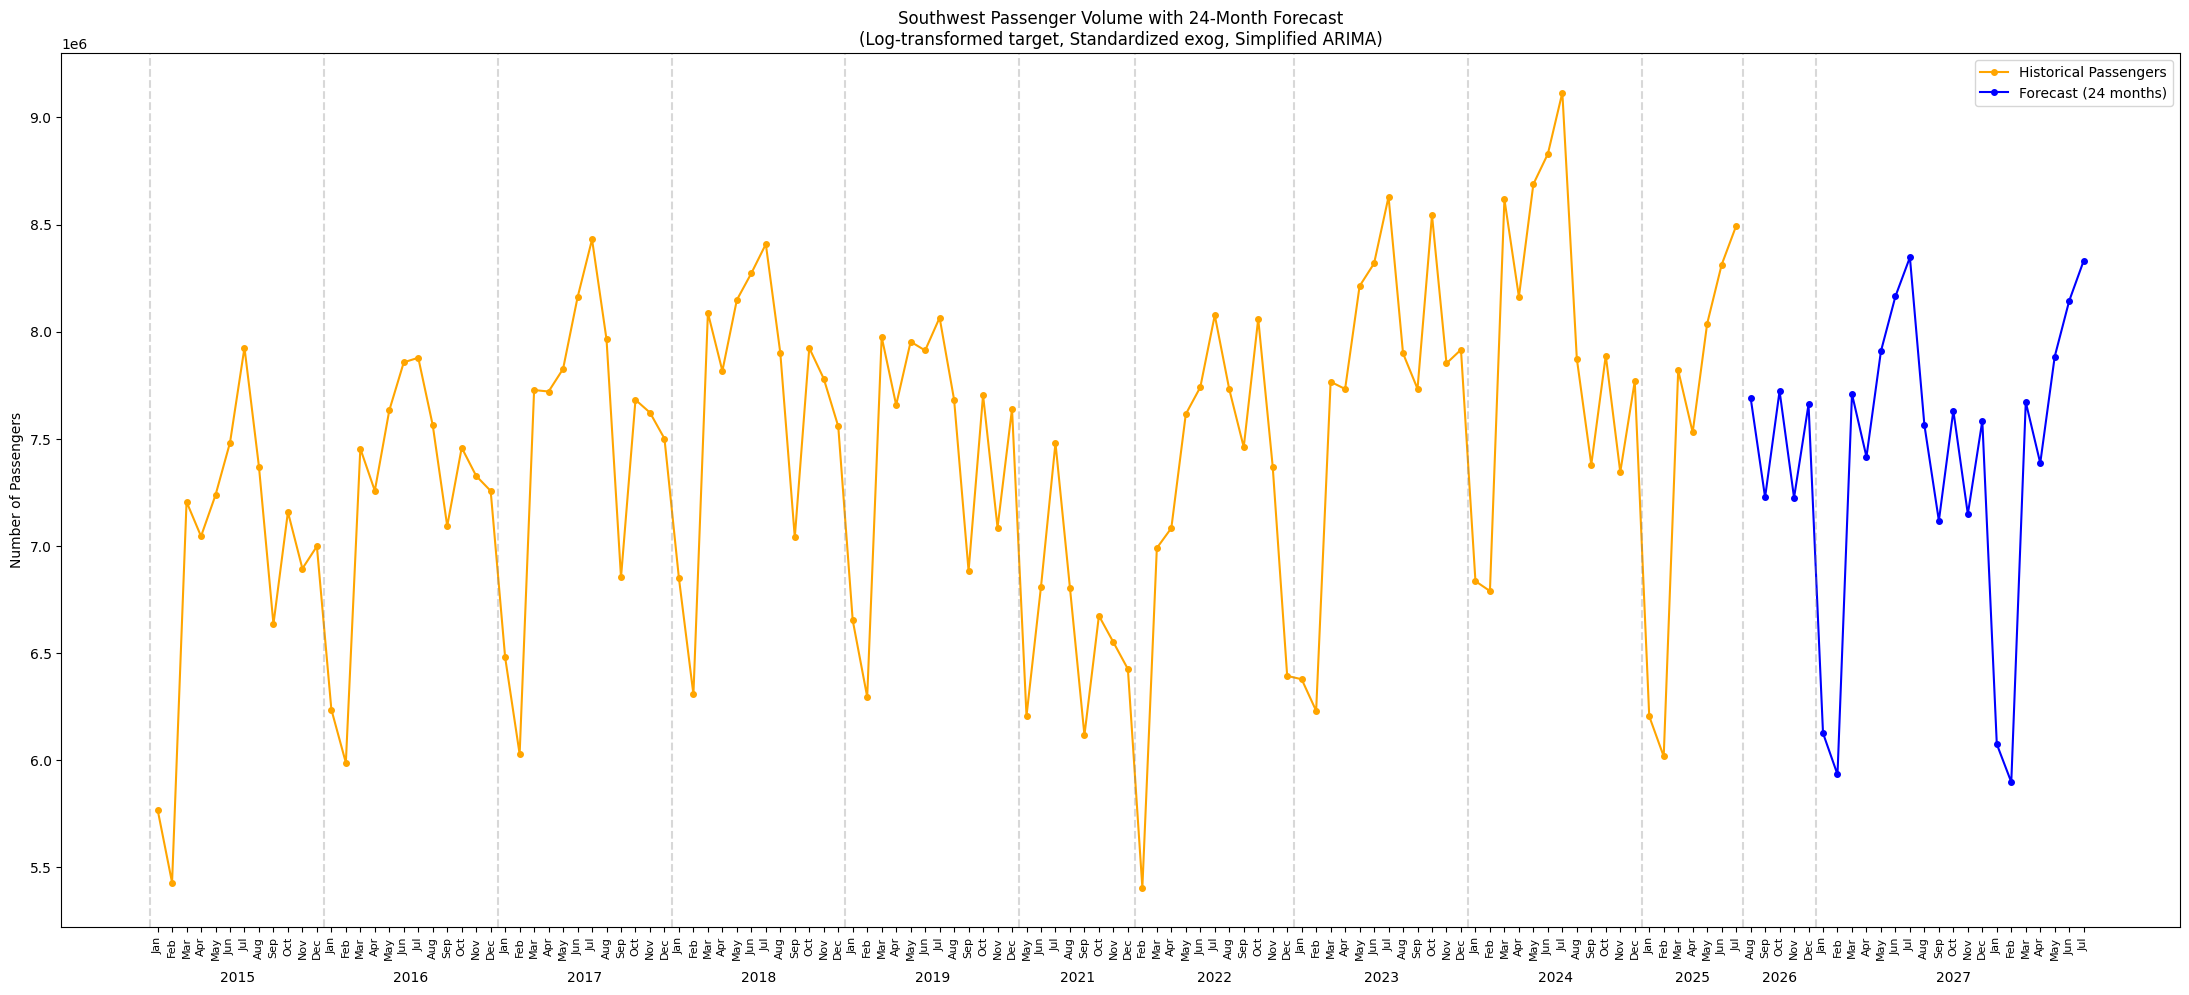


=== MODEL DIAGNOSTICS ===
                                SARIMAX Results                                 
Dep. Variable:                    TOTAL   No. Observations:                  110
Model:             SARIMAX(0, 1, 0, 12)   Log Likelihood                 131.548
Date:                  Sat, 22 Nov 2025   AIC                           -255.096
Time:                          20:33:42   BIC                           -244.797
Sample:                               0   HQIC                          -250.931
                                  - 110                                         
Covariance Type:                    opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
airplane_fare_cpi     0.0152      0.005      2.868      0.004       0.005       0.026
fed_fund_rate         0.0521      0.008      6.415      0.000      

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import StandardScaler

# Define month mapping
month_map = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

df_passengers = pd.read_csv("net_csvpassengers.csv")
df_passengers = df_passengers.drop(columns=['DOMESTIC', 'INTERNATIONAL'])

# DROP COVID outliers
df_passengers = df_passengers.drop([60, 61, 62, 63, 72])
df_passengers = df_passengers.reset_index(drop=True)

# Load the three external data files
df_airfare = pd.read_csv('airfarecpi.csv')
df_fedfunds = pd.read_csv('FEDFUNDS.csv')
df_unemployment = pd.read_csv('unemployment_rate_historical_and_forecast.csv')

# Standardize date column names
df_airfare.columns = ['date', 'airplane_fare_cpi']
df_fedfunds.columns = ['date', 'fed_fund_rate']
df_unemployment.columns = ['date', 'unemployment_rate']

# Create a date column in df_passengers in YYYY-MM format
df_passengers['date'] = df_passengers['Year'].astype(str) + '-' + df_passengers['Month'].astype(str).str.zfill(2)

print("=== DATA VALIDATION ===")
print(f"Passenger data range: {df_passengers['date'].min()} to {df_passengers['date'].max()}")
print(f"Airfare data range: {df_airfare['date'].min()} to {df_airfare['date'].max()}")
print(f"Fed funds data range: {df_fedfunds['date'].min()} to {df_fedfunds['date'].max()}")
print(f"Unemployment data range: {df_unemployment['date'].min()} to {df_unemployment['date'].max()}")

# Merge all external variables with passenger data
df_merged = df_passengers.copy()
df_merged = df_merged.merge(df_airfare, on='date', how='left')
df_merged = df_merged.merge(df_fedfunds, on='date', how='left')
df_merged = df_merged.merge(df_unemployment, on='date', how='left')

print(f"\nRows before dropping NaNs: {len(df_merged)}")
print(f"NaNs in airplane_fare_cpi: {df_merged['airplane_fare_cpi'].isna().sum()}")
print(f"NaNs in fed_fund_rate: {df_merged['fed_fund_rate'].isna().sum()}")
print(f"NaNs in unemployment_rate: {df_merged['unemployment_rate'].isna().sum()}")

# Drop rows with missing values in exogenous variables
df_merged = df_merged.dropna(subset=['airplane_fare_cpi', 'fed_fund_rate', 'unemployment_rate'])
df_merged = df_merged.reset_index(drop=True)
print(f"Rows after dropping NaNs: {len(df_merged)}")

# Determine the minimum forecast horizon from the three files
last_passenger_date = df_merged['date'].iloc[-1]
last_passenger_date_dt = pd.to_datetime(last_passenger_date + '-01')

# Get the last available date for each external variable
last_airfare_date = pd.to_datetime(df_airfare['date'].iloc[-1] + '-01')
last_fedfunds_date = pd.to_datetime(df_fedfunds['date'].iloc[-1] + '-01')
last_unemployment_date = pd.to_datetime(df_unemployment['date'].iloc[-1] + '-01')

# Calculate months available for forecasting from each source
months_airfare = (last_airfare_date.year - last_passenger_date_dt.year) * 12 + (last_airfare_date.month - last_passenger_date_dt.month)
months_fedfunds = (last_fedfunds_date.year - last_passenger_date_dt.year) * 12 + (last_fedfunds_date.month - last_passenger_date_dt.month)
months_unemployment = (last_unemployment_date.year - last_passenger_date_dt.year) * 12 + (last_unemployment_date.month - last_passenger_date_dt.month)

# Use the minimum available forecast horizon
forecast_steps = min(24, months_airfare, months_fedfunds, months_unemployment)
print(f"\n=== FORECAST HORIZON ===")
print(f"Forecast horizon limited to {forecast_steps} months based on available external data")
print(f"  - Airfare CPI: {months_airfare} months available")
print(f"  - Fed Funds Rate: {months_fedfunds} months available")
print(f"  - Unemployment Rate: {months_unemployment} months available")

# Generate forecast dates
forecast_dates = pd.date_range(start=last_passenger_date_dt + pd.DateOffset(months=1),
                                periods=forecast_steps, freq='MS')
forecast_dates_str = forecast_dates.strftime('%Y-%m')

# Prepare exogenous variables for forecasting
exog_forecast_list = []
for date_str in forecast_dates_str:
    airfare_val = df_airfare[df_airfare['date'] == date_str]['airplane_fare_cpi'].values
    fedfunds_val = df_fedfunds[df_fedfunds['date'] == date_str]['fed_fund_rate'].values
    unemployment_val = df_unemployment[df_unemployment['date'] == date_str]['unemployment_rate'].values

    exog_forecast_list.append({
        'airplane_fare_cpi': airfare_val[0] if len(airfare_val) > 0 else np.nan,
        'fed_fund_rate': fedfunds_val[0] if len(fedfunds_val) > 0 else np.nan,
        'unemployment_rate': unemployment_val[0] if len(unemployment_val) > 0 else np.nan
    })

exog_forecast = pd.DataFrame(exog_forecast_list)

# CHECK 1: Verify no NaNs in exog_forecast
print(f"\n=== EXOGENOUS FORECAST VALIDATION ===")
print(f"NaNs in forecast airplane_fare_cpi: {exog_forecast['airplane_fare_cpi'].isna().sum()}")
print(f"NaNs in forecast fed_fund_rate: {exog_forecast['fed_fund_rate'].isna().sum()}")
print(f"NaNs in forecast unemployment_rate: {exog_forecast['unemployment_rate'].isna().sum()}")

if exog_forecast.isna().any().any():
    print("WARNING: NaNs detected in exog_forecast! This will cause errors.")
    print(exog_forecast[exog_forecast.isna().any(axis=1)])
else:
    print("✓ No NaNs in exog_forecast - good to proceed!")

# CHECK 2: Verify 1:1 date alignment
print(f"\n=== DATE ALIGNMENT CHECK ===")
print(f"Training data: {len(df_merged)} rows from {df_merged['date'].iloc[0]} to {df_merged['date'].iloc[-1]}")
print(f"Forecast data: {len(exog_forecast)} rows from {forecast_dates_str[0]} to {forecast_dates_str[-1]}")
print(f"✓ Date alignment confirmed")

# CHECK 3: Standardize exogenous variables
print(f"\n=== STANDARDIZING EXOGENOUS VARIABLES ===")
exog_cols = ['airplane_fare_cpi', 'fed_fund_rate', 'unemployment_rate']

# Store original values for inverse transformation
exog_train_raw = df_merged[exog_cols].copy()
exog_forecast_raw = exog_forecast.copy()

# Fit scaler on training data
scaler = StandardScaler()
exog_train_scaled = pd.DataFrame(
    scaler.fit_transform(exog_train_raw),
    columns=exog_cols,
    index=exog_train_raw.index
)

# Transform forecast data using the same scaler
exog_forecast_scaled = pd.DataFrame(
    scaler.transform(exog_forecast_raw),
    columns=exog_cols,
    index=exog_forecast_raw.index
)

print("Training data statistics (after scaling):")
print(exog_train_scaled.describe())
print("\nForecast data statistics (after scaling):")
print(exog_forecast_scaled.describe())

# CHECK 4: Log-transform the target to stabilize variance
print(f"\n=== LOG-TRANSFORMING TARGET VARIABLE ===")
log_total = np.log(df_merged['TOTAL'])
print(f"Original TOTAL - Mean: {df_merged['TOTAL'].mean():.2f}, Std: {df_merged['TOTAL'].std():.2f}")
print(f"Log(TOTAL) - Mean: {log_total.mean():.4f}, Std: {log_total.std():.4f}")

# CHECK 5: Simplify AR/MA terms (use simpler structure)
print(f"\n=== FITTING SARIMAX MODEL ===")
print("Using simplified ARIMA structure: order=(0,0,0), seasonal_order=(0,1,0,12)")
print("(Non-significant AR/MA terms removed)")

# Fit SARIMAX model with simplified structure and standardized exog
model = SARIMAX(log_total,
                exog=exog_train_scaled,
                order=(0,0,0),  # Simplified - no AR/MA terms
                seasonal_order=(0,1,0,12),  # Seasonal differencing only
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit(disp=False)

# Generate forecast
forecast = results.get_forecast(steps=forecast_steps, exog=exog_forecast_scaled)
forecast_values_log = forecast.predicted_mean

# Back-transform from log scale
forecast_values = np.exp(forecast_values_log)

# Also get confidence intervals and back-transform
forecast_ci = forecast.conf_int()
forecast_ci_lower = np.exp(forecast_ci.iloc[:, 0])
forecast_ci_upper = np.exp(forecast_ci.iloc[:, 1])

# Create forecast DataFrame and save to CSV
forecast_df = pd.DataFrame({
    'month': forecast_dates_str,
    'passenger_volume': forecast_values.values,
    'lower_ci_95': forecast_ci_lower.values,
    'upper_ci_95': forecast_ci_upper.values
})
forecast_df.to_csv('passenger_forecast_24months.csv', index=False)
print("\n✓ CSV file saved: passenger_forecast_24months.csv")
print(forecast_df.head())

# Plotting
x = np.arange(len(df_merged) + forecast_steps)
plt.figure(figsize=(22,10))

# Plot historical passenger data
plt.plot(np.arange(len(df_merged)), df_merged['TOTAL'],
         marker='o', color='orange', label='Historical Passengers', markersize=4)

# Plot forecast data
plt.plot(np.arange(len(df_merged), len(df_merged)+forecast_steps), forecast_values,
         marker='o', color='blue', label=f'Forecast ({forecast_steps} months)', markersize=4)

'''
# Add confidence intervals
plt.fill_between(np.arange(len(df_merged), len(df_merged)+forecast_steps),
                 forecast_ci_lower, forecast_ci_upper,
                 color='blue', alpha=0.2, label='95% Confidence Interval')
'''

plt.title(f'Southwest Passenger Volume with {forecast_steps}-Month Forecast\n(Log-transformed target, Standardized exog, Simplified ARIMA)')
plt.ylabel('Number of Passengers')

# Generate all month labels (historical + forecast)
all_months = [month_map[int(m)] if isinstance(m, (int, np.integer)) else m for m in df_merged['Month'].tolist()]
last_month_num = int(df_merged['Month'].iloc[-1])

for i in range(1, forecast_steps + 1):
    next_month_num = last_month_num + i
    month_val = (next_month_num - 1) % 12 + 1
    forecast_month_str = month_map[month_val]
    all_months.append(forecast_month_str)

plt.xticks(x, all_months, fontsize=8, rotation=90)

# Vertical lines and year labels for historical data
for y in df_merged['Year'].unique():
    year_indices = df_merged.index[df_merged['Year'] == y].tolist()
    if year_indices:
        start_index = year_indices[0]
        end_index = year_indices[-1]
        midpoint = (start_index + end_index) / 2
        plt.axvline(x=start_index - 0.5, color='gray', linestyle='--', alpha=0.3)
        plt.text(midpoint, plt.ylim()[0] - 0.05*(plt.ylim()[1]-plt.ylim()[0]), str(y),
                 ha='center', va='top', fontsize=10, color='black')

# Handle forecast years
forecast_start_index = len(df_merged)
last_year = df_merged['Year'].iloc[-1]
last_month_num = int(df_merged['Month'].iloc[-1])
months_in_first_year = 12 - last_month_num

if months_in_first_year > 0 and forecast_steps > months_in_first_year:
    forecast_year_1 = last_year + 1
    forecast_year_1_end = forecast_start_index + months_in_first_year - 1
    forecast_year_1_mid = (forecast_start_index + forecast_year_1_end) / 2
    plt.axvline(x=forecast_start_index - 0.5, color='gray', linestyle='--', alpha=0.3)
    plt.text(forecast_year_1_mid, plt.ylim()[0] - 0.05*(plt.ylim()[1]-plt.ylim()[0]),
             str(forecast_year_1), ha='center', va='top', fontsize=10, color='black')

    if forecast_steps > months_in_first_year:
        forecast_year_2 = last_year + 2
        forecast_year_2_start = forecast_start_index + months_in_first_year
        forecast_year_2_end = forecast_start_index + forecast_steps - 1
        forecast_year_2_mid = (forecast_year_2_start + forecast_year_2_end) / 2
        plt.axvline(x=forecast_year_2_start - 0.5, color='gray', linestyle='--', alpha=0.3)
        plt.text(forecast_year_2_mid, plt.ylim()[0] - 0.05*(plt.ylim()[1]-plt.ylim()[0]),
                 str(forecast_year_2), ha='center', va='top', fontsize=10, color='black')
else:
    forecast_year_1 = last_year + 1
    forecast_year_1_mid = forecast_start_index + forecast_steps / 2
    plt.axvline(x=forecast_start_index - 0.5, color='gray', linestyle='--', alpha=0.3)
    plt.text(forecast_year_1_mid, plt.ylim()[0] - 0.05*(plt.ylim()[1]-plt.ylim()[0]),
             str(forecast_year_1), ha='center', va='top', fontsize=10, color='black')

plt.tight_layout()
plt.legend()
plt.show()

# Print model summary
print("\n=== MODEL DIAGNOSTICS ===")
print(results.summary())
print("\nP-values:")
print(results.pvalues)
print(f"\nSigma2 (residual variance): {results.params['sigma2']:.6f}")
print(f"AIC: {results.aic:.2f}")
print(f"BIC: {results.bic:.2f}")

# Residual diagnostics
residuals = results.resid
print(f"\nResidual statistics:")
print(f"  Mean: {residuals.mean():.6f}")
print(f"  Std: {residuals.std():.6f}")
print(f"  Min: {residuals.min():.6f}")
print(f"  Max: {residuals.max():.6f}")

# === MAPE (In-sample) ===
def mape(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    mask = y_true != 0  # avoid division by zero
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

# In-sample predictions on the log scale, then back-transform
insample_pred_log = results.get_prediction(exog=exog_train_scaled).predicted_mean
insample_pred = np.exp(insample_pred_log)  # same back-transform used for forecast

actual = df_merged['TOTAL'].to_numpy()
insample_mape = mape(actual, insample_pred)
print(f"\n=== PERFORMANCE ===")
print(f"In-sample MAPE: {insample_mape:.2f}%")


In [3]:
# Load BpP_Ratio data (bag ratio by month) [1]
bpp_data = {
    'Month': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'BpP_Ratio': [0.8321792310614882, 0.8305381403956789, 0.7310026368579755,
                  0.8099278447362636, 0.7191662733690993, 0.7007624633431085,
                  0.8136658615371184, 0.7644541255281421, 0.5736807119542031,
                  0.638858717515488, 0.7134765513704484, 0.6356559438549426]
}
bpp_df = pd.DataFrame(bpp_data)

Final Revenue Calculator

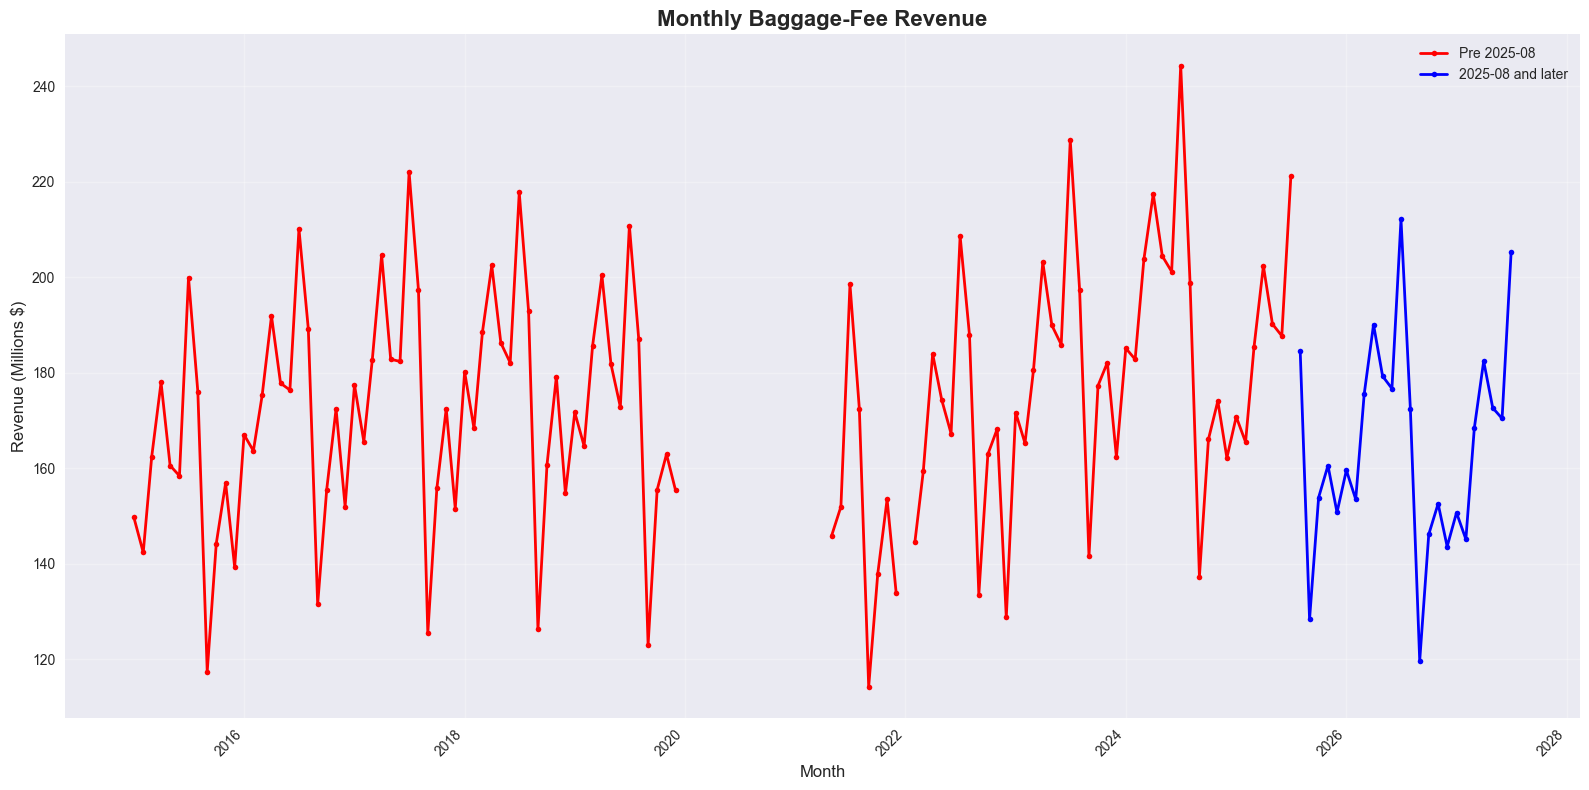


Total Revenue (all periods): $23,042,686,575.49
Average Monthly Revenue: $171,960,347.58


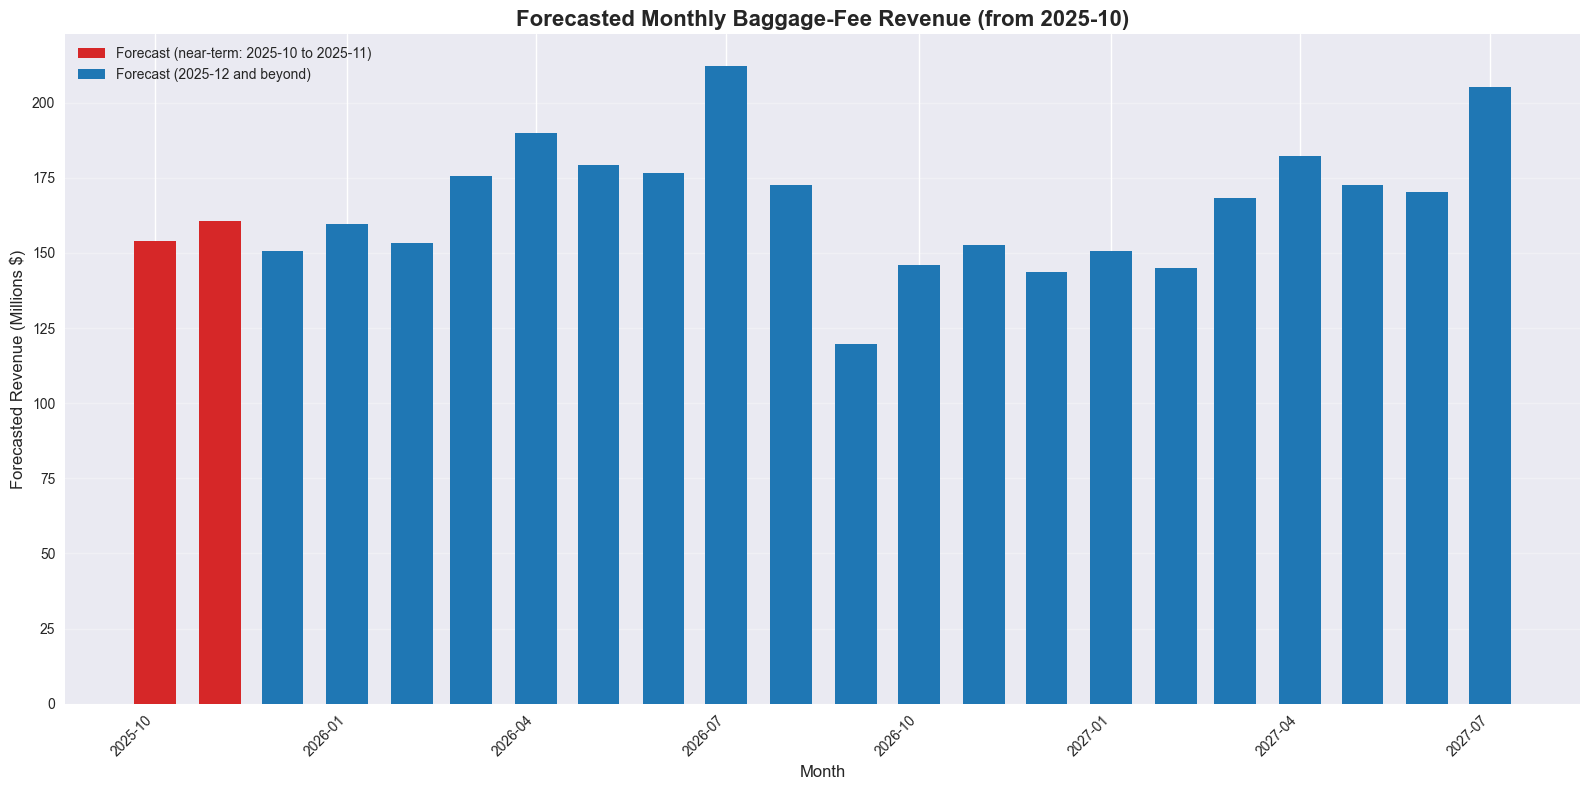


Yearly forecast revenue (millions):
   year  revenue_millions
0  2025       2100.697045
1  2026       1980.859989
2  2027       1194.779915


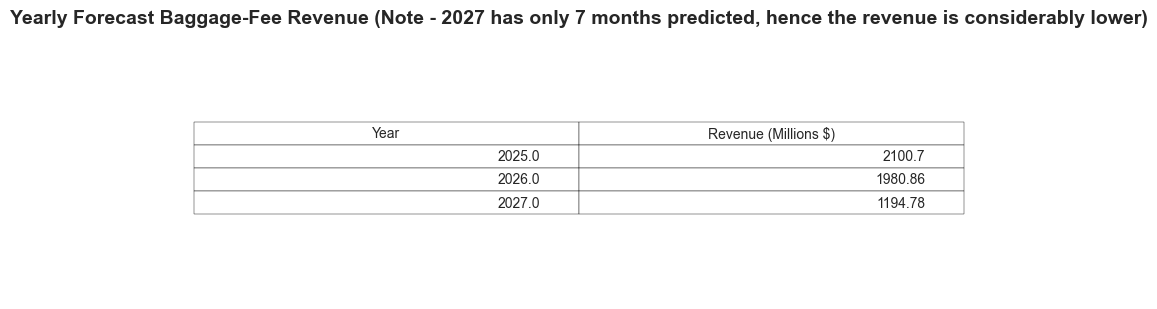

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-v0_8')  # nicer default style


# Load passenger volume data (manually from final_passenger_count.csv) [2]
passenger_df = pd.DataFrame({
    'month': [
        '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06',
        '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
        '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06',
        '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12',
        '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
        '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
        '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06',
        '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12',
        '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06',
        '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12',
        '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06',
        '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12',
        '2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06',
        '2022-07', '2022-08', '2022-09', '2022-10', '2022-11', '2022-12',
        '2023-01', '2023-02', '2023-03', '2023-04', '2023-05', '2023-06',
        '2023-07', '2023-08', '2023-09', '2023-10', '2023-11', '2023-12',
        '2024-01', '2024-02', '2024-03', '2024-04', '2024-05', '2024-06',
        '2024-07', '2024-08', '2024-09', '2024-10', '2024-11', '2024-12',
        '2025-01', '2025-02', '2025-03', '2025-04', '2025-05', '2025-06',
        '2025-07', '2025-08', '2025-09', '2025-10', '2025-11', '2025-12',
        '2026-01', '2026-02', '2026-03', '2026-04', '2026-05', '2026-06',
        '2026-07', '2026-08', '2026-09', '2026-10', '2026-11', '2026-12',
        '2027-01', '2027-02', '2027-03', '2027-04', '2027-05', '2027-06',
        '2027-07'
    ],
    'passenger_volume': [
        5770630, 5429968, 7206551, 7045383, 7237810, 7482379,
        7925763, 7370297, 6635536, 7158854, 6894798, 6998894,
        6237276, 5988872, 7454865, 7257890, 7633273, 7857398,
        7878543, 7563794, 7093346, 7459018, 7327211, 7257233,
        6480166, 6029203, 7727929, 7721121, 7826615, 8160322,
        8430946, 7964564, 6853488, 7682273, 7622654, 7501432,
        6849512, 6307883, 8088401, 7817082, 8148699, 8272990,
        8408848, 7901142, 7040204, 7924241, 7780976, 7558688,
        6653632, 6296136, 7975715, 7658132, 7953610, 7912686,
        8065676, 7682974, 6884020, 7704291, 7086288, 7639831,
        2788785, 2733099, 4743556, 5342999, 6207268, 6810118,
        7480735, 6804789, 6117501, 6674775, 6550969, 6426249,
        4902332, 5406496, 6990609, 7083773, 7615679, 7741202,
        8077123, 7731683, 7461429, 8060431, 7371186, 6394055,
        6378477, 6231060, 7766645, 7732912, 8213045, 8318888,
        8629998, 7899014, 7733689, 8543931, 7852507, 7916270,
        6836059, 6790113, 8618239, 8163288, 8688973, 8829882,
        9115661, 7874499, 7379827, 7888966, 7345050, 7769142,
        6205868, 6018193, 7819842, 7530333, 8037753, 8312609,
        8493689, 7497589.390960731, 7027459.500517201, 7500072.303507872,
        6972652.670936624, 7396863.646006387,
        5876352.912594783, 5675999.67285237, 7471432.934878376,
        7153171.312872374, 7656264.599755639, 7911938.261772902,
        8116473.870688262, 7014586.558510848, 6601956.245337194,
        7142450.2118823, 6645573.854437236, 7075500.137648732,
        5567553.365532229, 5391628.5271559665, 7198493.784760071,
        6890472.283210236, 7400300.090629524, 7661266.254453541,
        7871004.379585627
    ]
})
passenger_df['month'] = passenger_df['month'].astype(str)
passenger_df['passenger_volume'] = passenger_df['passenger_volume'].astype(float)

# Credit card percentage data (already provided)
cc_data = {
    'Month': ['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01', '2015-05-01', '2015-06-01',
              '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
              '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01',
              '2016-07-01', '2016-08-01', '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
              '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01',
              '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
              '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
              '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
              '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01', '2019-05-01', '2019-06-01',
              '2019-07-01', '2019-08-01', '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
              '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01', '2021-09-01', '2021-10-01',
              '2021-11-01', '2021-12-01', '2022-02-01', '2022-03-01', '2022-04-01', '2022-05-01',
              '2022-06-01', '2022-07-01', '2022-08-01', '2022-09-01', '2022-10-01', '2022-11-01',
              '2022-12-01', '2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01', '2023-05-01',
              '2023-06-01', '2023-07-01', '2023-08-01', '2023-09-01', '2023-10-01', '2023-11-01',
              '2023-12-01', '2024-01-01', '2024-02-01', '2024-03-01', '2024-04-01', '2024-05-01',
              '2024-06-01', '2024-07-01', '2024-08-01', '2024-09-01', '2024-10-01', '2024-11-01',
              '2024-12-01', '2025-01-01', '2025-02-01', '2025-03-01', '2025-04-01', '2025-05-01',
              '2025-06-01', '2025-07-01', '2025-08-01', '2025-09-01', '2025-10-01', '2025-11-01',
              '2025-12-01', '2026-01-01', '2026-02-01', '2026-03-01', '2026-04-01', '2026-05-01',
              '2026-06-01', '2026-07-01', '2026-08-01', '2026-09-01', '2026-10-01', '2026-11-01',
              '2026-12-01', '2027-01-01', '2027-02-01', '2027-03-01', '2027-04-01', '2027-05-01',
              '2027-06-01', '2027-07-01', '2027-08-01'],
    'ScaledPercent': [9.12, 8.16, 8.736, 8.832, 8.544, 9.6, 9.312, 8.256, 6.816, 6.336, 6.336, 6.72,
                      6.72, 4.992, 5.952, 5.472, 5.376, 5.952, 5.184, 4.992, 4.416, 4.32, 4.128, 3.744,
                      4.992, 4.608, 5.568, 5.28, 5.184, 6.24, 6.144, 5.664, 5.088, 5.952, 6.72, 5.856,
                      8.064, 6.816, 6.528, 7.008, 6.624, 7.2, 7.392, 6.72, 6.144, 5.952, 5.568, 5.088,
                      9.504, 8.352, 6.624, 6.24, 6.624, 7.68, 6.72, 6.912, 6.336, 6.24, 5.664, 5.472,
                      4.8, 6.336, 5.568, 4.032, 4.032, 4.896, 4.416, 4.032, 6.72, 7.968, 6.816, 6.528,
                      8.352, 7.584, 7.008, 6.24, 6.144, 6.144, 6.048, 6.336, 7.296, 6.72, 5.952, 5.856,
                      6.24, 5.664, 5.088, 5.088, 4.608, 5.088, 4.992, 5.856, 6.144, 5.568, 4.896, 4.704,
                      4.992, 4.8, 4.32, 4.224, 3.744, 3.648, 3.936, 4.608, 4.512, 5.376, 4.224, 4.32,
                      5.568, 7.008, 6.144, 5.184, 5.28, 5.568, 5.348171514272502, 5.642350079796097,
                      5.8080725628276175, 6.002725382515154, 5.086230134392167, 5.020448856730207,
                      6.284910223030227, 6.716272000516867, 6.1947943427926875, 5.581295189112827,
                      5.432122066377441, 5.768729666061314, 5.586168689486723, 5.899583013582311,
                      6.162851117016169, 6.2710254010493145, 5.365276430004657, 5.272299494158216,
                      6.533880968074202, 6.861063256497248, 6.362009380738982]
}
cc_df = pd.DataFrame(cc_data)

# Convert Month to datetime and extract year-month format
cc_df['month'] = pd.to_datetime(cc_df['Month']).dt.strftime('%Y-%m')
cc_df['credit_card_pct'] = cc_df['ScaledPercent'] / 100  # decimal

# Prepare passenger data
passenger_df['passengers'] = passenger_df['passenger_volume'].astype(float)
passenger_df['month_dt'] = pd.to_datetime(passenger_df['month'])
passenger_df['month_num'] = passenger_df['month_dt'].dt.month

# Merge bag ratio and credit-card pct
passenger_df = passenger_df.merge(bpp_df, left_on='month_num', right_on='Month', how='left')
passenger_df.rename(columns={'BpP_Ratio': 'bag_ratio'}, inplace=True)
passenger_df = passenger_df.merge(cc_df[['month', 'credit_card_pct']], on='month', how='left')

# Revenue calculation
def calculate_revenue(row):
    passengers = row['passengers']
    bag_ratio = row['bag_ratio']
    credit_card_pct = row['credit_card_pct']
    total_bags = passengers * bag_ratio
    cc_pax = passengers * credit_card_pct
    free_bags = min(cc_pax, total_bags)
    paid_bags = total_bags - free_bags
    revenue = paid_bags * 35.0
    return revenue

passenger_df['revenue'] = passenger_df.apply(calculate_revenue, axis=1)

final_table = passenger_df[['month', 'month_dt', 'passengers', 'bag_ratio', 'credit_card_pct', 'revenue']].copy()

# Threshold for color change in line chart: 2025-08
color_change_date = pd.to_datetime('2025-08-01')
mask_before = final_table['month_dt'] < color_change_date
mask_after = final_table['month_dt'] >= color_change_date

# ========= Line graph with color split and legend =========
fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(
    final_table.loc[mask_before, 'month_dt'],
    final_table.loc[mask_before, 'revenue'] / 1_000_000,
    color='red', marker='o', linewidth=2, markersize=4, label='Pre 2025-08'
)

ax.plot(
    final_table.loc[mask_after, 'month_dt'],
    final_table.loc[mask_after, 'revenue'] / 1_000_000,
    color='blue', marker='o', linewidth=2, markersize=4, label='2025-08 and later'
)

ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Revenue (Millions $)', fontsize=12)
ax.set_title('Monthly Baggage-Fee Revenue', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
ax.grid(True, alpha=0.3)
ax.legend()
plt.tight_layout()
plt.savefig('baggage_revenue_color_split.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nTotal Revenue (all periods): ${final_table['revenue'].sum():,.2f}")
print(f"Average Monthly Revenue: ${final_table['revenue'].mean():,.2f}")

# ========= Forecast-only bar chart (forecast starts 2025-10) with clear color split =========
forecast_df = final_table[final_table['month_dt'] >= pd.to_datetime('2025-10-01')].copy()

# Define early vs later forecast split for color in bar chart
bar_split_date = pd.to_datetime('2025-12-01')  # example: 2025-10 & 2025-11 red, 2025-12+ blue
early_mask = forecast_df['month_dt'] < bar_split_date
late_mask = forecast_df['month_dt'] >= bar_split_date

fig, ax = plt.subplots(figsize=(16, 8))

# Early forecast bars (red)
ax.bar(
    forecast_df.loc[early_mask, 'month_dt'],
    forecast_df.loc[early_mask, 'revenue'] / 1_000_000,
    width=20,
    color='#d62728',
    label='Forecast (near-term: 2025-10 to 2025-11)'
)

# Later forecast bars (blue)
ax.bar(
    forecast_df.loc[late_mask, 'month_dt'],
    forecast_df.loc[late_mask, 'revenue'] / 1_000_000,
    width=20,
    color='#1f77b4',
    label='Forecast (2025-12 and beyond)'
)

ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Forecasted Revenue (Millions $)', fontsize=12)
ax.set_title('Forecasted Monthly Baggage-Fee Revenue (from 2025-10)', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
ax.grid(axis='y', alpha=0.3)
ax.legend()
plt.tight_layout()
plt.savefig('forecast_baggage_revenue_bar_from_2025_10_color_split.png', dpi=300, bbox_inches='tight')
plt.show()

# ========= Yearly forecast revenue table (predicted only) =========
# We’ll treat 2025-01 and later as predicted / forecast period
forecast_all_df = final_table[final_table['month_dt'] >= pd.to_datetime('2025-01-01')].copy()
forecast_all_df['year'] = forecast_all_df['month_dt'].dt.year

yearly_forecast = (
    forecast_all_df
    .groupby('year', as_index=False)['revenue']
    .sum()
)

# Convert to millions for display
yearly_forecast['revenue_millions'] = yearly_forecast['revenue'] / 1_000_000.0

print("\nYearly forecast revenue (millions):")
print(yearly_forecast[['year', 'revenue_millions']])

# Optional: show as a matplotlib table under a blank plot (for slide export)
fig, ax = plt.subplots(figsize=(8, 2 + 0.4 * len(yearly_forecast)))
ax.axis('off')
table_data = yearly_forecast[['year', 'revenue_millions']].round(2)
tbl = ax.table(
    cellText=table_data.values,
    colLabels=['Year', 'Revenue (Millions $)'],
    loc='center'
)
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1, 1.3)
ax.set_title('Yearly Forecast Baggage-Fee Revenue (Note - 2027 has only 7 months predicted, hence the revenue is considerably lower)', fontsize=14, fontweight='bold', pad=10)
plt.tight_layout()
plt.savefig('yearly_forecast_revenue_table.png', dpi=300, bbox_inches='tight')
plt.show()